# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## FINAL PROJECT
## Starter code

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To get acquainted with representative datasets and problems in data science and machine learning
- To learn how to implement several different machine learning models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in 3 parts.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 195 (plus up to 100 bonus points).

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [1]:

#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
def display_confusion_matrix(test_labels, predicted_labels, xticklabels='auto', yticklabels='auto'):
    
    conf_mat = confusion_matrix(test_labels, predicted_labels)

    sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=xticklabels, yticklabels=yticklabels)

    plt.xlabel('true label')
    plt.ylabel('predicted label');

-------------------
## Part 1: Decision trees

In this part, we will take another look at the Iris dataset.

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1.1 Your turn! (25 points)

Write code to: 

1. Display the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset. (15 pts)
2. Compute relevant summary statistics for each species. (10 pts)

## Solution

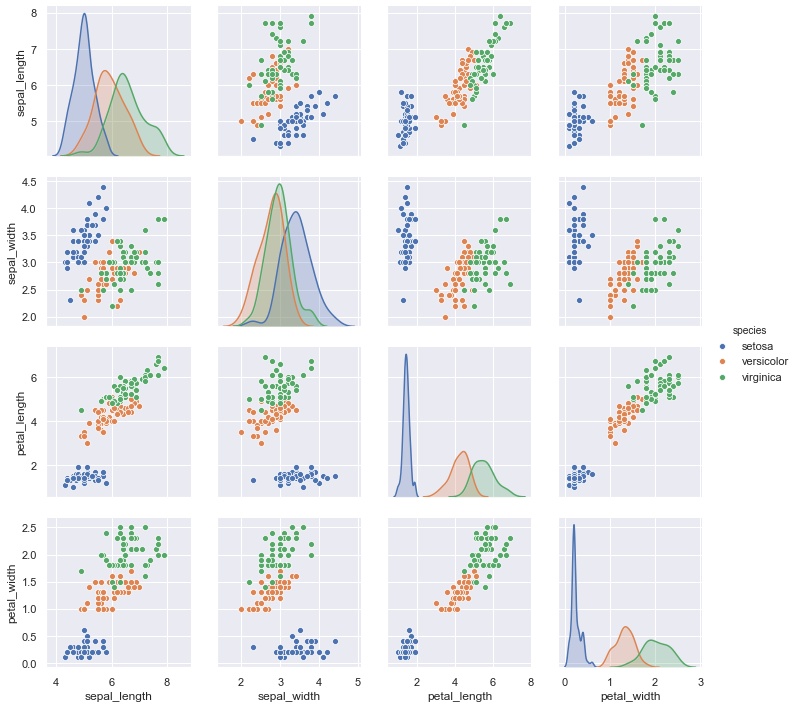

In [4]:
sns.pairplot(iris, hue='species', height=2.5);

In [5]:

def print_summary_stats(species):
    
    df = iris[iris['species'] == species]

    attributes = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
    
    for attribute in attributes:
        
        print(f'{species} {attribute} mean: ', df[attribute].mean())
        print(f'{species} {attribute} std: ', df[attribute].std())       
    
print_summary_stats('setosa')
print_summary_stats('versicolor')
print_summary_stats('virginica')


setosa petal_length mean:  1.4620000000000002
setosa petal_length std:  0.17366399648018407
setosa petal_width mean:  0.24599999999999997
setosa petal_width std:  0.10538558938004565
setosa sepal_length mean:  5.006
setosa sepal_length std:  0.35248968721345136
setosa sepal_width mean:  3.428
setosa sepal_width std:  0.3790643690962887
versicolor petal_length mean:  4.26
versicolor petal_length std:  0.46991097723995795
versicolor petal_width mean:  1.3259999999999998
versicolor petal_width std:  0.19775268000454405
versicolor sepal_length mean:  5.936
versicolor sepal_length std:  0.5161711470638634
versicolor sepal_width mean:  2.7700000000000005
versicolor sepal_width std:  0.3137983233784114
virginica petal_length mean:  5.5520000000000005
virginica petal_length std:  0.5518946956639834
virginica petal_width mean:  2.0260000000000002
virginica petal_width std:  0.2746500556366674
virginica sepal_length mean:  6.587999999999998
virginica sepal_length std:  0.6358795932744322
virgini

## 1.2 Your turn! (35 points)

Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (10 pts)
2. Plot the resulting decision tree. It should look similar to the plot below. (15 pts)
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. (10 pts)

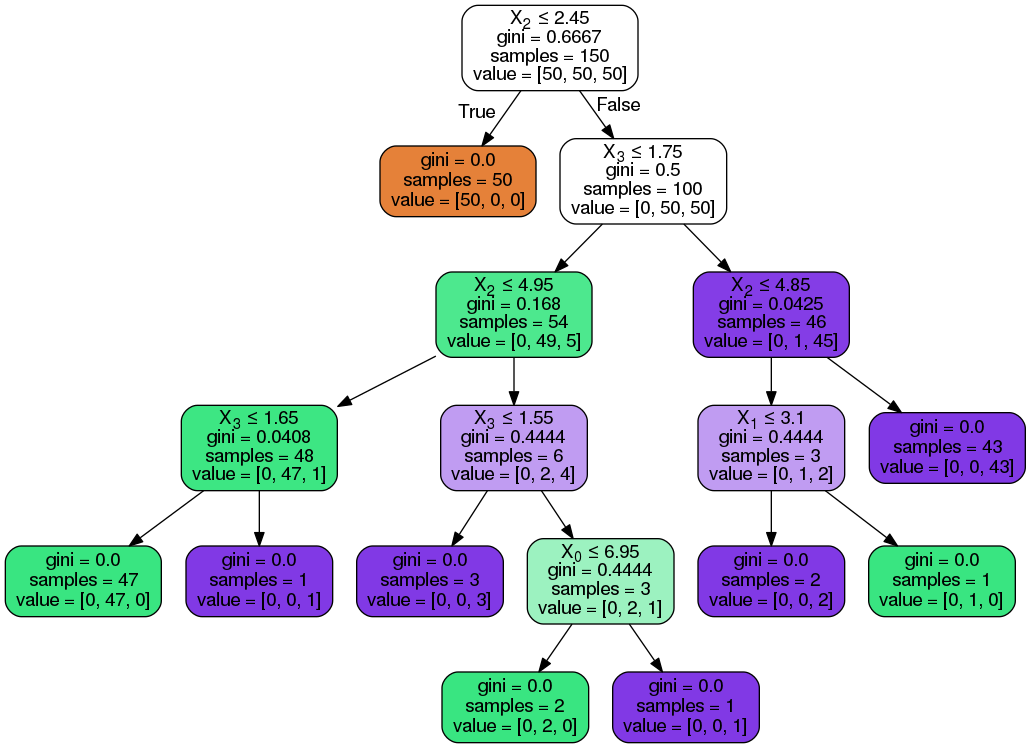

## Solution

In [6]:

X = iris.loc[:,'sepal_length':'petal_width']
y = iris['species']


In [7]:

 # criterion=’gini’ max_depth=None
decisionTreeClassifier = DecisionTreeClassifier(random_state=0)
decisionTreeClassifier.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### By supplying the class names and feature names, we can improve on the above tree and have it display these characteristics.

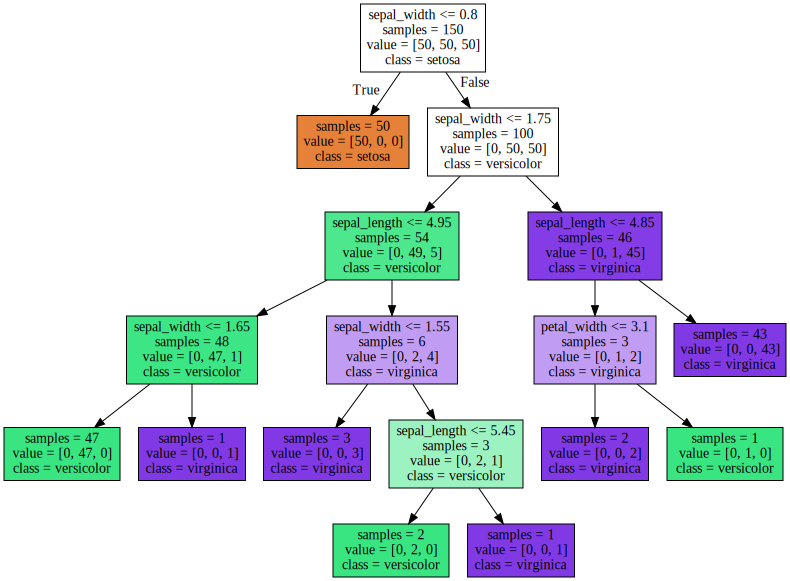

In [8]:

export_graphviz(decisionTreeClassifier, 
                out_file="tree.dot", 
                class_names=['setosa', 'versicolor', 'virginica'],
                feature_names=['petal_length', 'petal_width', 'sepal_length', 'sepal_width'],
                impurity=False, 
                filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


#### Some observations on the above tree: 

It took 6 levels to classify each observation--we will limit this in the next section.  In the very first split, we are able to separate all of the setosa records because each one has a sepal width of <= 0.8cm.  Looking at the 6th and last level, we see that we are only classifying 3 records. So, we could probably improve upon the model by limiting the max depth to 5, since we really aren't getting much of an accuracy improvement by having that last level.  This would lead to some impurity, but it's all a trade-off.  __To me, that last layer is just over-fitting.__

In [9]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(decisionTreeClassifier, X, y, cv=3)

print('All Scores: ', scores)
print('Mean Score: ', scores.mean())


All Scores:  [0.98039216 0.92156863 1.        ]
Mean Score:  0.9673202614379085


## Bonus opportunity 1 (15 points)

Make meaningful changes to the baseline code, e.g., trying different combinations of functions to measure the quality of a split, limiting the maximum depth of the tree, etc. 

Publish the code, the results, and comment on how they differ from the baseline (and your intuition as to *why* they do).

## Solution

In [10]:
decisionTreeClassifierV2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
decisionTreeClassifierV2.fit(X, y)

scoresV2 = cross_val_score(decisionTreeClassifierV2, X, y, cv=3)

print('All Scores: ', scoresV2)
print('Mean Score: ', scoresV2.mean())


decisionTreeClassifierV3 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
decisionTreeClassifierV3.fit(X, y)

scoresV3 = cross_val_score(decisionTreeClassifierV3, X, y, cv=3)

print('All Scores: ', scoresV3)
print('Mean Score: ', scoresV3.mean())


All Scores:  [0.98039216 0.92156863 1.        ]
Mean Score:  0.9673202614379085
All Scores:  [0.96078431 0.90196078 0.97916667]
Mean Score:  0.9473039215686274


Changing the criterion doesn't seem to have a major effect on the scores but limiting the max depth definitely
does. This seems obvious...if we limit how deep the tree can go, then we limit how high the scores can be.  The code is not shown, but limiting the max depth to 1 gave a mean score of 66%--this is probably due to the fact that we were able to branch off all of the setosa observations in the root node.

The Criterion parameter allows us to choose entropy or gini. These are 2 different mechanisms that build the branching strategy. Here is the formula for both:

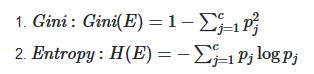

Both are used to measure the disorder of a grouping. Entropy is somewhat more computationally intensive due to the logs.

-------------------
## Part 2: Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. They are saved in the csv data files `mnist_train.csv` and `mnist_test.csv`. 

Every line of these files consists of a grayscale image and its label, i.e. 785 numbers between 0 and 255:
- The first number of each line is the label, i.e. the digit which is depicted in the image. 
- The following 784 numbers are the pixels of the 28 $\times$ 28 image.

The Python code below loads the images from CSV files, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [11]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/"
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", delimiter=",") 

In [12]:
test_data.shape

(10000, 785)

In [13]:
train_imgs = np.asfarray(train_data[:, 1:])/255.0
test_imgs = np.asfarray(test_data[:, 1:])/255.0
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [14]:

print('train_data.shape', train_data.shape)
print('train_labels.shape', train_labels.shape)
print('test_data.shape', test_data.shape)
print('test_labels.shape', test_labels.shape)


train_data.shape (60000, 785)
train_labels.shape (60000, 1)
test_data.shape (10000, 785)
test_labels.shape (10000, 1)


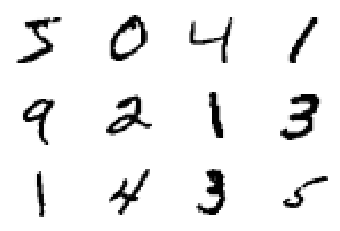

In [15]:
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_imgs[i].reshape((28,28)), cmap="Greys")
    axi.set(xticks=[], yticks=[])

## 2.1 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy will be around 83.5%

## Solution

#### A few words about Gaussian, Bernoulli, Multinomial and the regular Naive Bayes. 

From Wiki and other various sites, and my own understanding from reading these sites: 

- naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models...

- ...all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.


1. Bernoulli -- features are independent booleans (binary variables) describing inputs. The features are binary.


2. Multinomial -- It's is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label. __I'm not 100% why we are using this classifier for the iris dataset. It seems to me that it might make more sense to use the Gaussian, described below.__


3. Gaussian -- When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution. Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here. So if I understand this correctly, it is saying that a feature, sat petal_length is normally distribute.

In [16]:
X = train_data
y = train_labels.ravel()

In [17]:

multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(X, y);


In [18]:

predicted_labels = multinomialNB_model.predict(test_data)


In [19]:

accuracy_score(test_labels, predicted_labels)


0.8366

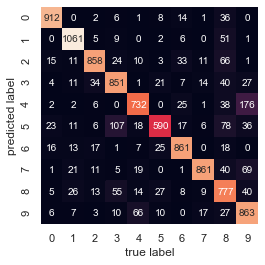

In [20]:

display_confusion_matrix(test_labels, predicted_labels)


## 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: your accuracy should be > 90%

## Solution

#### What is a Random Forrest?

Decision Trees seem to have a certain level of over-fitting.  One way to assuage this is to have multiple Decision Trees and combine their data along with a certain amount of stochastic-ness/randomness.  That's Random Forrests.

In [21]:

randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=0)

randomForestClassifier.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:

predicted_labels = randomForestClassifier.predict(test_data)


In [23]:

accuracy_score(test_labels, predicted_labels)


0.9859

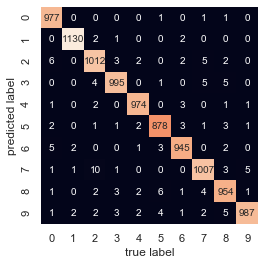

In [24]:

display_confusion_matrix(test_labels, predicted_labels)


## 2.3 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. (5 pts)
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. (15 pts)

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

## Solution

In [25]:
                   
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X, y);


In [26]:

predicted_labels = gaussianNB_model.predict(test_data)


In [27]:

accuracy_score(test_labels, predicted_labels)


0.9964

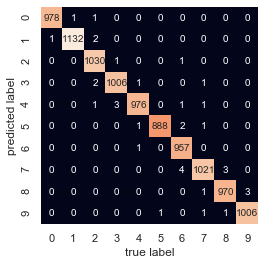

In [28]:

display_confusion_matrix(test_labels, predicted_labels)


-------------------
## Part 3: Face Recognition 

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

Hint: you will have to install Pillow for this part. See https://pillow.readthedocs.io/en/stable/

In [29]:

faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)


['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


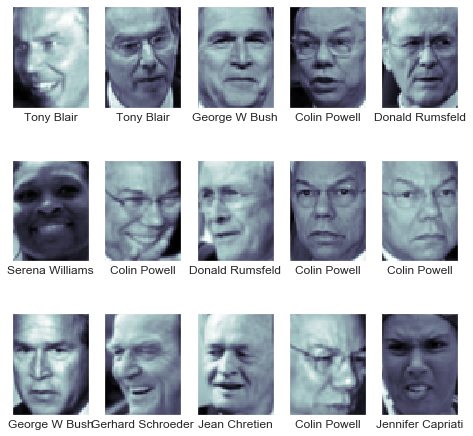

In [30]:
plt.rcParams["figure.figsize"]=8,8
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## 3.1 Your turn! (55 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. (10 pts)
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. (10 pts)
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. (25 pts)
4. Display examples of correct and incorrect predictions (at least 5 of each). (10 pts)

## Solution

In [31]:

pca = PCA(n_components=120, whiten=True, random_state=0)


In [32]:

svc = SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pca, svc)


In [33]:

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=0)


In [34]:

param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid, cv=5, iid=True)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)


Wall time: 49.9 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [35]:

model = grid.best_estimator_
y_predictions = model.predict(Xtest)


Examine test images along with their predicted values:

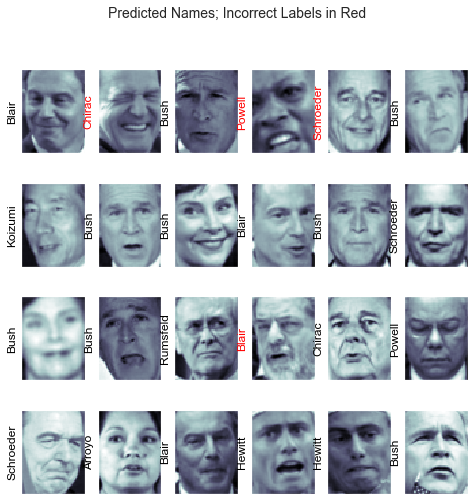

In [36]:

fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_predictions[i]].split()[-1], color='black' if y_predictions[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [37]:

print(classification_report(ytest, y_predictions, target_names=faces.target_names))


                           precision    recall  f1-score   support

             Ariel Sharon       0.78      0.78      0.78        18
    Arnold Schwarzenegger       0.50      0.23      0.32        13
             Colin Powell       0.72      0.87      0.79        54
          Donald Rumsfeld       0.74      0.85      0.79        27
            George W Bush       0.72      0.92      0.81       131
        Gerhard Schroeder       0.85      0.73      0.79        30
  Gloria Macapagal Arroyo       1.00      0.82      0.90        11
              Hugo Chavez       1.00      0.72      0.84        25
           Jacques Chirac       0.71      0.45      0.56        11
            Jean Chretien       1.00      0.55      0.71        11
        Jennifer Capriati       0.86      0.50      0.63        12
            John Ashcroft       0.78      0.44      0.56        16
        Junichiro Koizumi       1.00      0.91      0.95        22
               Laura Bush       1.00      0.71      0.83     

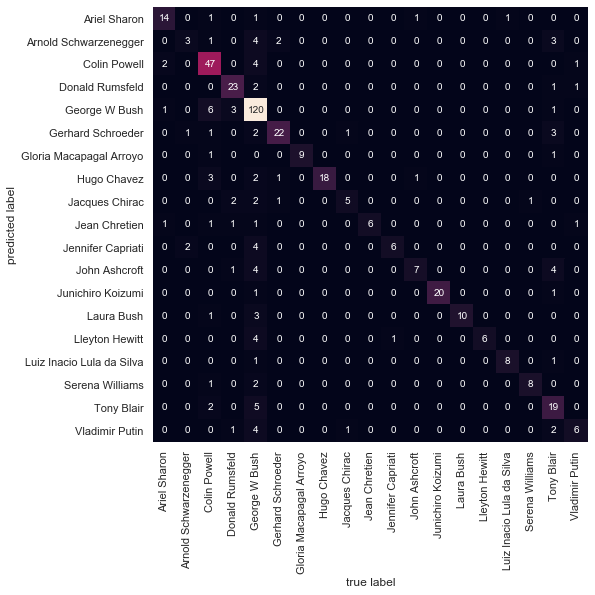

In [38]:

display_confusion_matrix(ytest, y_predictions, xticklabels=faces.target_names, yticklabels=faces.target_names)


## Bonus opportunity 2 (35 points)

Make meaningful changes to the baseline code, e.g.:

- trying different combinations of SVM parameters following a grid search cross-validation approach.
- experimenting with different values of number of components for the PCA and showing how much of the variance they explain (i.e., plotting the cumulative explained variance as a function of the number of components).
- using "data augmentation" to generate additional training images (for under-represented classes).

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [39]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Bonus opportunity 3 (50 points)

Write code to incorporate face detection capabilities (see "Face Detection Pipeline" in the textbook), improve it to include non-maximal suppression (to produce 'clean' detection results) and demonstrate how it can be used to:
- load an image that the model has never seen before (e.g. an image you downloaded from the Internet)
- locate (i.e. detect) the face in the image
- resize the face region to 62 $\times$ 47 pixels
- run the face recognition code you wrote above and produce a message showing the closest 'celebrity' from the dataset.

Publish the code, the results, and document your steps and the rationale behind them.

## Solution

In [40]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

1. What have you learned from this assignment?

I've learned quite a bit about Decision Trees--that is where I spend much of my time on this project. Decision Trees seem to be a good place to end a Data Science course as they lead into what might be considered Data Science 2 / Machine Learning.  Random Forests were also new to me, I really like the simplicity with which I can make use of these very complicated objects.  The image recognition was more of a review from the Computer Vision class, but it's still really interesting, especially since we used Neural Networks more than SVMs.

2. Which parts were the most fun, time-consuming, enlightening, tedious?

The most tedious items usually end up being either some method not working right or a component not installed correctly. For example, the ravel() statement in 2.1 or the graphiz install.  Decision Trees were the most enlightening for me. They are easy to understand and I could find myself applying them to everyday problems. Most fun: It's all fun. I really enjoy this topic and if FAU does finalize the Data Science Master's program I might just have to sigh up for that after I complete this MSCS.

3. What would you do if you had an additional week to work on this?

The bonus questions. Perhaps I will re-submit this if I have time to look a them.  I would like to have spent more time on each classifier, but I realize there is only so much we can cover in one course. Perhaps Data Science 1 should focus more on python and Statistics and Data Science 2 can get into the Machine Learning aspect of it all.